<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/yenlung/%E4%BD%9C%E6%A5%AD%E4%B8%89_%E8%AC%9D%E5%9D%A4%E9%81%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### 你也可以讀入 Fasion 版的 MNIST

In [5]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

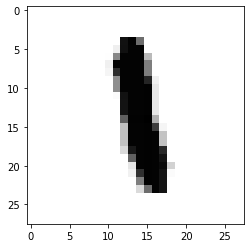

In [11]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [12]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train[n]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 4. step 1: 打造神經網路

## 修改部分: 
### 1. 多一層全連接層
### 2. 各層的 node 數: 32, 64, 128
### 3. 使用的激活函數: sigmoid

In [15]:
model = Sequential()

In [16]:
model.add(Dense(32, input_dim=784, activation='sigmoid'))

In [17]:
model.add(Dense(64, activation='sigmoid'))

In [18]:
model.add(Dense(128, activation='sigmoid'))

In [19]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

## 修改 optimizer 為 Adam, learning rate 為 0.001

In [20]:
model.compile(loss='mse', optimizer=Adam(lr=0.001), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#### 欣賞我們的作品

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

## 執行結果 準確率98.12% 比範例的 93.17%準確率還好

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 4s 3ms/step - loss: 0.0472 - accuracy: 0.6522
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0148 - accuracy: 0.9064
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0109 - accuracy: 0.9301
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0091 - accuracy: 0.9423
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0080 - accuracy: 0.9487
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0072 - accuracy: 0.9543
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0066 - accuracy: 0.9585
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0060 - accuracy: 0.9615
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9657
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9681

### 6. step 3: 預測 (testing)

### 原本的函數: predict_class已不能用, 直接使用 predict

In [23]:
predict = model.predict(x_test)

神經網路預測是: [2.57300762e-05 2.44700047e-08 8.62648478e-04 1.15228382e-09
 1.28621359e-05 1.17683034e-04 9.98917341e-01 4.25456725e-10
 6.37220364e-05 3.28443628e-09]


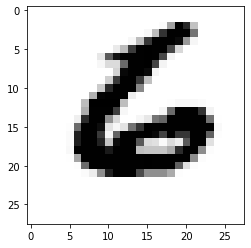

In [24]:
n = 9999

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [25]:
model.save("my_nn.h5")